# the IoT device is FitBit Fitness Tracker

### the buisnis problem is how many Calories did the IoT's user loss

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("dailyActivity_merged1.csv")
print(data.shape)
data.head()


(940, 15)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### Feature enginering

In [3]:
data['TotalTime'] = (data['VeryActiveMinutes']+data['FairlyActiveMinutes']+
                     data['LightlyActiveMinutes']+data['SedentaryMinutes'])
data['SpeedMilePerSecond'] = data['TotalDistance']/data['TotalTime']

In [4]:
data.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalTime,SpeedMilePerSecond
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,0.007770
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,0.006747
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,0.004681
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,0.006293
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,0.007846


### inforamtion about the data

In [5]:
## the number of user in the dataset
user_len = len(data['Id'].unique())

print(f"the number of uses in the data is {user_len}")

the number of uses in the data is 33


In [6]:
# kow how many daya per user in the data
userActivityDayCount = []
for i in data['Id'].unique():
    dff = data[data["Id"] == i]
    userActivityDayCount.append(dff['ActivityDate'].count())

# find the date of activity
from numpy import mean
print(mean(userActivityDayCount))


28.484848484848484


## EDA

In [7]:
# droping trackerDistance 
data.drop(columns=['TrackerDistance'], inplace=True)

### Null values in the data

In [8]:
data.isnull().sum().sum()

0

### data describtion

In [9]:
data.describe()

,Id,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalTime,SpeedMilePerSecond
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,0.004746
std,2.424805e+09,5087.150742,3.924606,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,0.003350
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,0.002331
50%,4.445115e+09,7405.500000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,0.004279
75%,6.962181e+09,10727.000000,7.712500,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,0.006989
max,8.877689e+09,36019.000000,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,0.019465


### Report

In [10]:
from pandas_profiling import ProfileReport

Report = ProfileReport(data, minimal=True).to_notebook_iframe()

Report

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Visualization

In [11]:
import random

In [12]:
# chose a random user
random_user = random.choice(data['Id'].unique())
# creat a dataframe for this pationt to visulaize it 
randome_user_data = data.loc[data['Id'] == random_user]

In [13]:
def cm_to_inch(value):
    """this function will conver the value from in to cm"""
    return value/2.54

In [14]:
import matplotlib.pyplot as plt

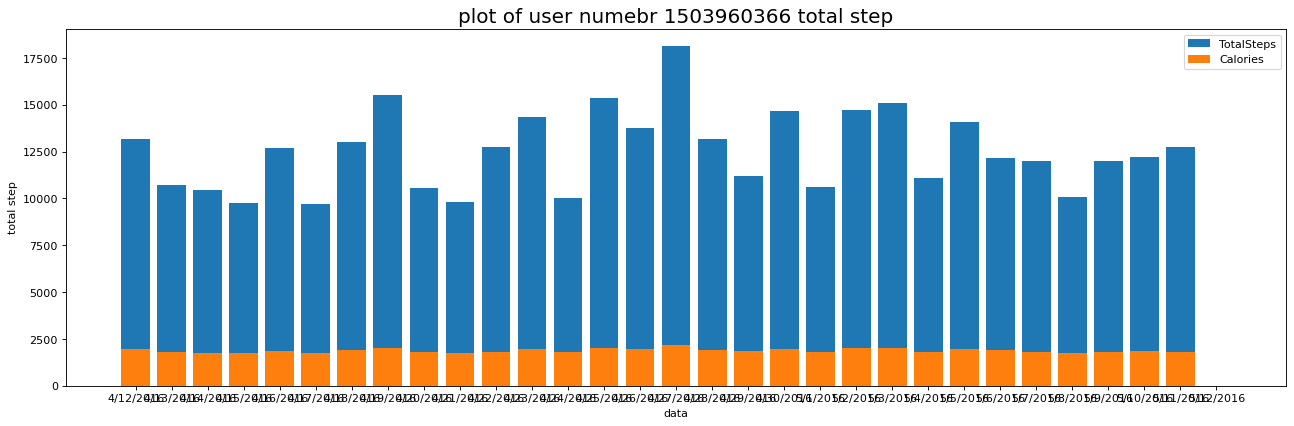

In [15]:
# data frame where the TotalSteps more than zero
no_zero_total_step_random_user = randome_user_data

# plot the total step for the user
plt.figure(figsize=(cm_to_inch(50),cm_to_inch(15)), dpi=80);
plt.bar(no_zero_total_step_random_user['ActivityDate'],
        no_zero_total_step_random_user['TotalSteps'])
plt.bar(no_zero_total_step_random_user['ActivityDate'],
        no_zero_total_step_random_user['Calories'])
plt.title(f"plot of user numebr {random_user} total step", size=18)
plt.xlabel("data")
plt.ylabel("total step")
plt.legend(['TotalSteps','Calories'])
plt.show();

In [16]:
import seaborn as sns

In [17]:
# select a randem data for the random user
random_date =  random.choice(no_zero_total_step_random_user['ActivityDate'].unique())

# creat a dataframe for the activities Distance
random_date_distance = no_zero_total_step_random_user.loc[
    no_zero_total_step_random_user['ActivityDate'] == f"{random_date}",
                                          ['LoggedActivitiesDistance','VeryActiveDistance',
                                          'ModeratelyActiveDistance','LightActiveDistance',
                                          'SedentaryActiveDistance']]
# total dictance the user were active on 
active_dic = no_zero_total_step_random_user.loc[
    no_zero_total_step_random_user['ActivityDate'] == f"{random_date}",
    "TotalDistance"].reset_index(drop=True)[0]
# chang it to a columns dataframe
random_date_distance = random_date_distance.T
# get the non_zeros values only
random_date_distance_nonzero = random_date_distance.loc[
    random_date_distance[random_date_distance.columns[0]] >0]

# create a list of the labels
random_date_distance_index = random_date_distance_nonzero.index.tolist()
# create a list of the values
random_date_distance_value = [i for i in 
                              random_date_distance_nonzero[
                                  random_date_distance_nonzero.columns[0]]]

In [18]:
# creat a dataframe for the activities Minutes
random_date_minutes = no_zero_total_step_random_user.loc[
    no_zero_total_step_random_user['ActivityDate'] == f"{random_date}",
                                          ['VeryActiveMinutes','FairlyActiveMinutes',
                                          'LightlyActiveMinutes','SedentaryMinutes']]
# total minut the user were active on  
active_min = no_zero_total_step_random_user.loc[
    no_zero_total_step_random_user['ActivityDate'] == f"{random_date}",
    "TotalTime"].reset_index(drop=True)[0]
# chang it to a columns dataframe
random_date_minutes = random_date_minutes.T
# get the non_zeros values only
random_date_minutes_nonzero = random_date_minutes.loc[
    random_date_minutes[random_date_minutes.columns[0]] >0]

# create a list of the labels
random_date_minutes_index = random_date_minutes_nonzero.index.tolist()
# create a list of the values
random_date_minutes_value = [i for i in 
                              random_date_minutes_nonzero[
                                  random_date_minutes_nonzero.columns[0]]]

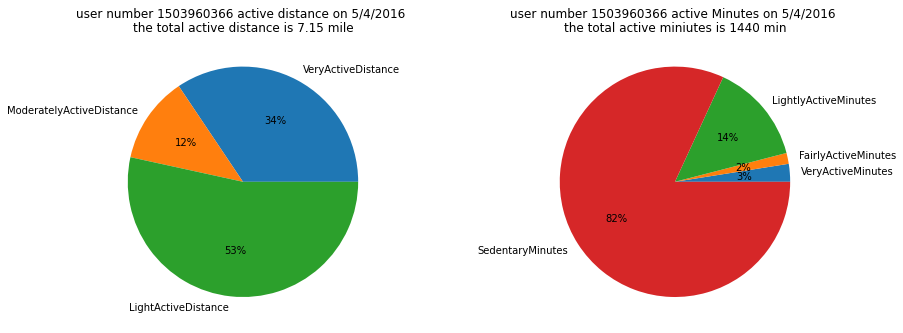

In [19]:
fig = plt.figure()
# plot the activities Distance
ax1 = fig.add_axes([0, 0, 1, 1], aspect=1)
ax1.pie(random_date_distance_value, labels = random_date_distance_index, autopct='%.00f%%')
ax1.set_title(f"user number {random_user} active distance on {random_date} \nthe total active distance is {round(active_dic,2)} mile")

#  plot the activities Minutes
ax2 = fig.add_axes([1, 0, 1, 1], aspect=1)
ax2.pie(random_date_minutes_value, labels = random_date_minutes_index, autopct='%.00f%%')
ax2.set_title(f"user number {random_user} active Minutes on {random_date} \nthe total active miniutes is {active_min} min")
plt.show();

C:\Users\mosae\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


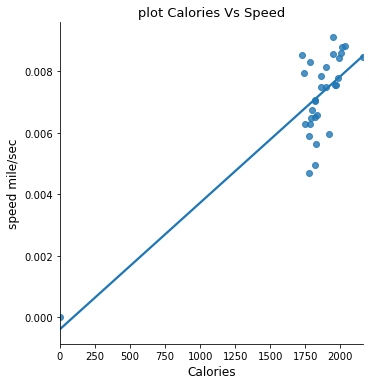

In [20]:
# scater plot the Calories with respect to speed
sns.lmplot('Calories', 'SpeedMilePerSecond',
            data=no_zero_total_step_random_user, ci = None);
plt.xlabel("Calories", size=12)
plt.ylabel("speed mile/sec", size=12)
plt.title("plot Calories Vs Speed", size=13);
plt.show();

#### The null hypothesis is that they are unrelated and the slope is =0.  The alternative hypothesis is that they are related and the slope is not equal to 0.  In symbolic notation:

**Ho: $\beta_1$ = 0**

**Ha: $\beta_1 \neq$ 0**

In [21]:
from statsmodels.formula.api import ols

In [22]:
# Test these hypotheses using statsmodels.api
model = ols('SpeedMilePerSecond ~ Calories', data= no_zero_total_step_random_user).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     SpeedMilePerSecond   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     61.06
Date:                Mon, 28 Feb 2022   Prob (F-statistic):           1.29e-08
Time:                        17:35:14   Log-Likelihood:                 170.70
No. Observations:                  31   AIC:                            -337.4
Df Residuals:                      29   BIC:                            -334.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004      0.001     -0.396      0.6

#### We reject the null hypothesis and conclude there is a statistically significant relationship between the amount of Calories lost and the speed of the user

### Data

In [23]:
# drop the ActivityDate and the Id of the user
data = data.drop(columns = ['Id','ActivityDate'])

In [24]:
# Target Column
y = data['Calories']
# feature matrix
X = data.drop(columns=['Calories'])

print(f'X shape {X.shape} \ny shape {y.shape}')

X shape (940, 13) 
y shape (940,)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# split the data using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

print(f'X_train shape {X_train.shape} ----> y_train shape  {y_train.shape} \nX_test shape {X_test.shape} ----> y_test shape  {y_test.shape}')

X_train shape (752, 13) ----> y_train shape  (752,) 
X_test shape (188, 13) ----> y_test shape  (188,)


### Baseline

In [27]:
from sklearn.metrics import mean_absolute_error

In [28]:
# get the average on the target column
print("Average Interest Rate", y.mean())

# creat a list of the average having the same lenght as the target columns
baseline_pred = [y.mean()] * len(y)
# get the baseline MAE
print("Baseline MAE:", mean_absolute_error(y, baseline_pred))

Average Interest Rate 2303.609574468085
Baseline MAE: 575.2693798098687


On average our predictions are off by 575.269 Calories

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [30]:
linearRegressionModel = make_pipeline(
    MinMaxScaler(),
    SimpleImputer(strategy='mean'),
    LinearRegression())

# fit the model
linearRegressionModel.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [31]:
print('Training MAE', mean_absolute_error(y_train, linearRegressionModel.predict(X_train)))
print('Validation MAE', mean_absolute_error(y_test, linearRegressionModel.predict(X_test)))
print('Validation R^2', linearRegressionModel.score(X_test, y_test))

Training MAE 270.9033917363764
Validation MAE 296.608732376726
Validation R^2 0.69886813279916


### Ridge

In [32]:
from sklearn.linear_model import Ridge

In [33]:
model_ridge = make_pipeline(
    MinMaxScaler(),
    SimpleImputer(strategy='mean'),
    Ridge())

model_ridge.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [34]:
print('Training MAE', mean_absolute_error(y_train, model_ridge.predict(X_train)))
print('Validation MAE', mean_absolute_error(y_test, model_ridge.predict(X_test)))
print('Validation R^2', model_ridge.score(X_test, y_test))

Training MAE 355.8187821000662
Validation MAE 362.97859733023864
Validation R^2 0.5726518387584276


### RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
model_forest = make_pipeline(
    MinMaxScaler(),
    SimpleImputer(strategy='mean'),
    RandomForestRegressor(random_state=42, n_jobs=-1))

model_forest.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
  

In [37]:
print('Training MAE', mean_absolute_error(y_train, model_forest.predict(X_train)))
print('Validation MAE', mean_absolute_error(y_test, model_forest.predict(X_test)))
print('Validation R^2', model_forest.score(X_test, y_test))

Training MAE 125.45371445542301
Validation MAE 306.8109330058236
Validation R^2 0.6548607350741116


### XGBRegressor

In [38]:
from xgboost import XGBRegressor

In [39]:
model_boost = make_pipeline(
    MinMaxScaler(),
    XGBRegressor(random_state=42, n_jobs=-1))

model_boost.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=-1, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=42,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_pa

In [40]:
print('Training MAE', mean_absolute_error(y_train, model_boost.predict(X_train)))
print('Validation MAE', mean_absolute_error(y_test, model_boost.predict(X_test)))
print('Validation R^2', model_boost.score(X_test, y_test))

Training MAE 37.73753633904964
Validation MAE 302.50268619618515
Validation R^2 0.6542888835077915


Looking at the four Regression we can conclued that :
- RandomForestRegressor and XGBRegressor models are overfitting the data 
- between Ridge and LinearRegression models LinearRegression have a lower MAE and higher R^2

## Classification

making the aproblem a Classification porblem

In [41]:
data["labeld_lost"] = "non"

In [42]:
# data["labeld_lost"] 
data.loc[(data["Calories"] <=1500), "labeld_lost" ] = "low_lost"
data.loc[(data["Calories"] >1500) & (data["Calories"] <=2500), "labeld_lost" ] = "mid_lost"
data.loc[(data["Calories"] >2500), "labeld_lost" ] = "high_lost"

### split data

In [43]:
# drop the Calories so there won't be an datalekage
data = data.drop(columns=['Calories'])

In [44]:
# # drop the Calories so there won't be an datalekage
# data = data.drop(columns=['Calories',])

# feature matrix
X = data.drop(columns=['labeld_lost'])

# target columns
y = data['labeld_lost']

print(f'X shape {X.shape} \ny shape {y.shape}')

X shape (940, 13) 
y shape (940,)


In [45]:
# split the data using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =42)

print(f'X_train shape {X_train.shape} ----> y_train shape  {y_train.shape} \nX_test shape {X_test.shape} ----> y_test shape  {y_test.shape}')

X_train shape (705, 13) ----> y_train shape  (705,) 
X_test shape (235, 13) ----> y_test shape  (235,)


### Baseline

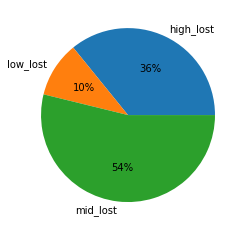

In [46]:
# calculat the persentage of each class in the database 
baseline = data['labeld_lost'].value_counts(normalize=True).sort_index()

# plet the result of the pace line with the persentage
plt.pie(baseline, labels = baseline.index, autopct='%1.0f%%');

In [47]:
print(f'Looking at the pie chart, the baseline acuracy will be {round(baseline.max()*100,2)}%')

Looking at the pie chart, the baseline acuracy will be 53.83%


### LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
from category_encoders import OneHotEncoder

In [49]:
model_logistic_regression =make_pipeline(
#     OneHotEncoder(),
    MinMaxScaler(),
    LogisticRegression(max_iter=300)
)

model_logistic_regression.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=300,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [50]:
print('Training Accuracy:', model_logistic_regression.score(X_train, y_train) )
print('Validation Accuracy:',model_logistic_regression.score(X_test, y_test) )

Training Accuracy: 0.7404255319148936
Validation Accuracy: 0.6851063829787234


### Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
model_forest_class =make_pipeline(
#     OneHotEncoder(),
    MinMaxScaler(),
    RandomForestClassifier(n_jobs=-1,
                           random_state=42)
)

model_forest_class.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [64]:
print('Training Accuracy:', model_forest_class.score(X_train, y_train) )
print('Validation Accuracy:',model_forest_class.score(X_test, y_test) )

Training Accuracy: 0.9815602836879432
Validation Accuracy: 0.7063829787234043


Interlude: Beware or Leakage

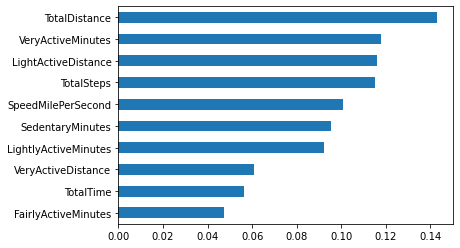

In [65]:
importances = model_forest_class.named_steps['randomforestclassifier'].feature_importances_
features = X_train.columns
pd.Series(importances,index=features).sort_values().tail(10).plot(kind='barh');

In [66]:
from sklearn.metrics import plot_confusion_matrix, classification_report

              precision    recall  f1-score   support

         low       0.79      0.75      0.77        84
         mid       0.29      0.19      0.23        26
        high       0.71      0.78      0.75       125

    accuracy                           0.71       235
   macro avg       0.60      0.58      0.58       235
weighted avg       0.69      0.71      0.70       235



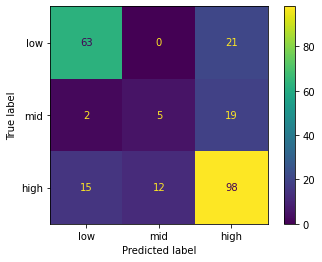

In [74]:
plot_confusion_matrix(
    model_forest_class,
    X_test,
    y_test,
    values_format = '.0f',
    display_labels = ['low','mid','high']
);
print(classification_report(y_test, model_forest_class.predict(X_test), target_names=['low', 'mid','high']))

In [73]:
print(classification_report(y_test, model_forest_class.predict(X_test), target_names=['low', 'mid','high']))

              precision    recall  f1-score   support

         low       0.79      0.75      0.77        84
         mid       0.29      0.19      0.23        26
        high       0.71      0.78      0.75       125

    accuracy                           0.71       235
   macro avg       0.60      0.58      0.58       235
weighted avg       0.69      0.71      0.70       235



### Tunning the RandomForestClassifier Model

In [68]:
pramas_grid={
    "randomforestclassifier__max_depth": np.arange(10,25,1),
    "randomforestclassifier__n_estimators":np.arange(35,44,1),
    'randomforestclassifier__min_samples_leaf':[4,6],
    'randomforestclassifier__min_samples_split':[4,6],
}

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
model_Ran_forest_tune = GridSearchCV(model_forest_class, 
                                     param_grid=pramas_grid, 
                                     n_jobs=-2, 
                                     cv=3, 
                                     verbose=2)

model_Ran_forest_tune.fit(X, y);

Fitting 3 folds for each of 540 candidates, totalling 1620 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-2)]: Done 258 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-2)]: Done 664 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-2)]: Done 1230 tasks      | elapsed:   24.4s
[Parallel(n_jobs=-2)]: Done 1620 out of 1620 | elapsed:   33.5s finished


In [71]:
#finding the accuracy for the train and val data

print(f'the new Random Forest model best score is {round((model_Ran_forest_tune.best_score_)*100,2)}%')
print('the Random Forest model best paremater is')
model_Ran_forest_tune.best_params_

the new Random Forest model best score is 69.15%
the Random Forest model best paremater is


{'randomforestclassifier__max_depth': 16,
 'randomforestclassifier__min_samples_leaf': 4,
 'randomforestclassifier__min_samples_split': 4,
 'randomforestclassifier__n_estimators': 36}